In [1]:
library(arules)
par(bg = "white", fg = "blue",col.lab = "blue", col.axis = "blue", col.main = "blue", col.sub = "blue")

Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write




# 14.1 关联规则

e.g.1:手机保护壳交易数据库中的关联规则

In [2]:
fp.df <- read.csv("Data/Faceplate.csv")

fp.mat <- as.matrix(fp.df[, -1])
fp.trans <- as(fp.mat, "transactions")
inspect(fp.trans)

     items                    
[1]  {Red, White, Green}      
[2]  {White, Orange}          
[3]  {White, Blue}            
[4]  {Red, White, Orange}     
[5]  {Red, Blue}              
[6]  {White, Blue}            
[7]  {Red, Blue}              
[8]  {Red, White, Blue, Green}
[9]  {Red, White, Blue}       
[10] {Yellow}                 


In [3]:
rules <- apriori(fp.trans, parameter = list(support = 0.2, confidence = 0.5, target = "rules"))
inspect(head(sort(rules, by = "lift"), n = 6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs               rhs     support confidence coverage lift     count
[1] {Red, White}   => {Green} 0.2     0.5        0.4      2.500000 2    
[2] {Green}        => {Red}   0.2     1.0        0.2      1.666667 2    
[3] {White, Green} => {Red}   0.2     1.0        0.2      1.666667 2    
[4]

e.g.2:图书购买交易数据库中的关联规则

In [4]:
book_df <- read.csv("Data/CharlesBookClub.csv")

count_book_df <- book_df[, 8:18]
incid_book_df <- ifelse(count_book_df > 0, 1, 0)
incid_book_mat <- as.matrix(incid_book_df[, -1])

books_trans <- as(incid_book_mat, "transactions")
inspect(books_trans)

       items       
[1]    {YouthBks,  
        CookBks}   
[2]    {}          
[3]    {YouthBks,  
        CookBks,   
        RefBks,    
        GeogBks,   
        ItalCook}  
[4]    {}          
[5]    {}          
[6]    {}          
[7]    {GeogBks}   
[8]    {}          
[9]    {}          
[10]   {CookBks}   
[11]   {CookBks}   
[12]   {ArtBks,    
        Florence}  
[13]   {Florence}  
[14]   {}          
[15]   {}          
[16]   {CookBks,   
        RefBks,    
        ArtBks,    
        GeogBks,   
        ItalCook,  
        ItalAtlas, 
        ItalArt}   
[17]   {YouthBks,  
        CookBks,   
        ArtBks,    
        ItalCook}  
[18]   {CookBks}   
[19]   {CookBks,   
        DoItYBks,  
        RefBks,    
        ArtBks}    
[20]   {CookBks,   
        ArtBks,    
        GeogBks,   
        Florence}  
[21]   {}          
[22]   {}          
[23]   {}          
[24]   {}          
[25]   {YouthBks,  
        CookBks,   
        DoItYBks,  
        ArtBks}    


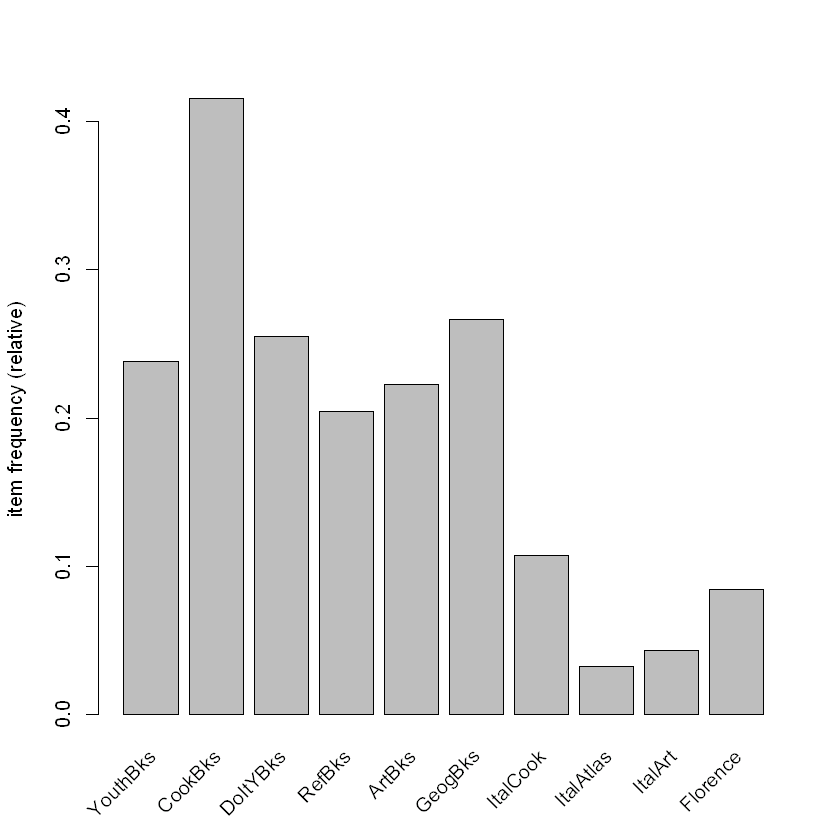

In [7]:
itemFrequencyPlot(books_trans)